<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


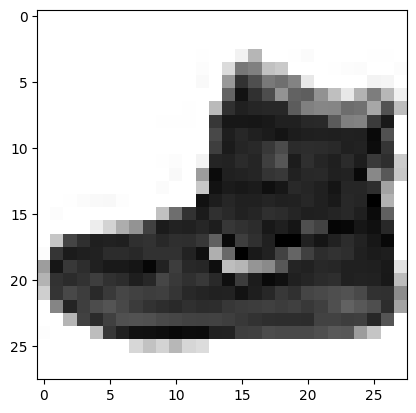

Cái này là:  9


In [3]:
duty = x_train[0]   # Từ 0-60000 giá trị
plt.imshow(duty, cmap= plt.cm.binary)
plt.show()
print('Cái này là: ', y_train[0])

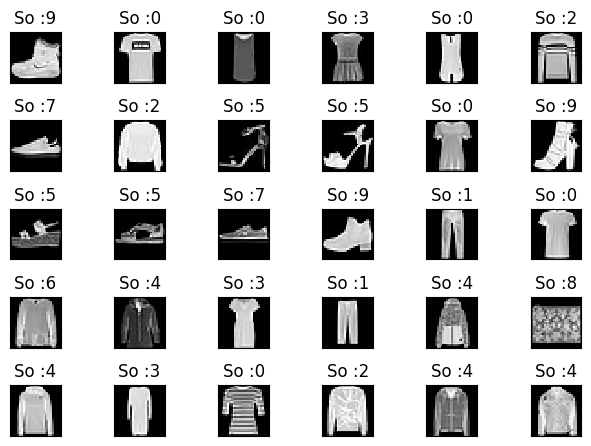

In [4]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
from keras.models import Sequential
from keras.layers import Dense

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))  #Hàm truyền relu tạo 512 noron trong 1 lop mạng ẩn 28*28,: chỉ có 1 cột dữ liệu
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 300)               153900    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 586,930
Trainable params: 586,930
Non-trainable params: 0
_________________________________________________________________


In [7]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical (y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=50)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/30
1200/1200 [==============================] - 16s 13ms/step - loss: 0.5151 - accuracy: 0.8108
Epoch 2/30
1200/1200 [==============================] - 15s 13ms/step - loss: 0.3796 - accuracy: 0.8615
Epoch 3/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3479 - accuracy: 0.8746
Epoch 4/30
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3360 - accuracy: 0.8785
Epoch 5/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.3252 - accuracy: 0.8840
Epoch 6/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.3234 - accuracy: 0.8845
Epoch 7/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3187 - accuracy: 0.8868
Epoch 8/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3119 - accuracy: 0.8895
Epoch 9/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3146 - accuracy: 0.8902
Epoch 10/30
1200/1200 [==============================] - 15s 12m

In [10]:
model.save('fashion_mnist.h5')

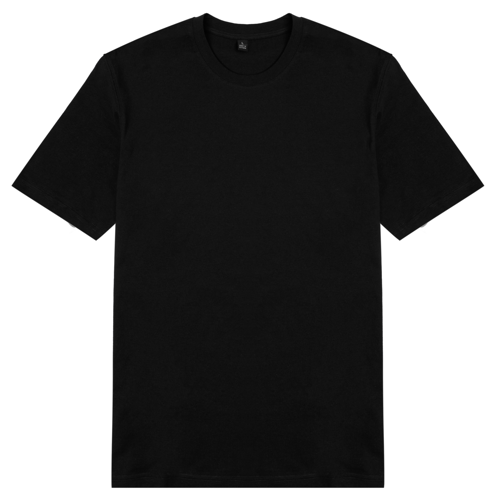

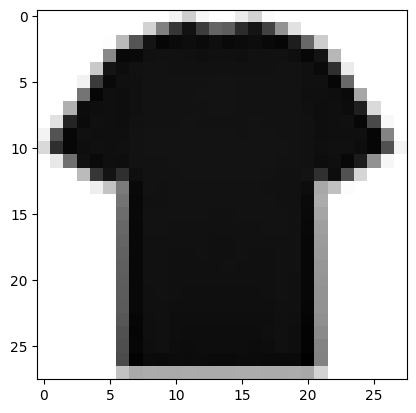

1/1 [==============================] - 0s 86ms/step
Số dự đoán: 9


In [16]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img, img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display

model = load_model('fashion_mnist.h5')
img = Image.open('ao thun.jpg')
img = img.resize((500,500))
display(img)
img = img.convert('L')
img = img.resize((28,28))
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()
img = np.array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255

pred = model.predict(img)
number = np.argmax(pred)
print('Số dự đoán:', number)